# Hand-written digits recognition


1. Perform ICA on images to extract features
2. train a supervised classifier (thanks to these features) to recognize numbers

# load an image

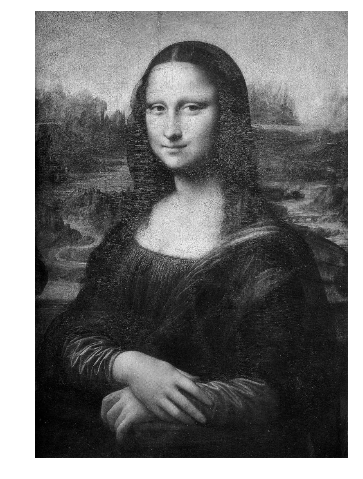

ratio 1.42875
<type 'float'>


In [99]:
import numpy
import scipy
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
def loadImageToMatrix(path):
    return scipy.misc.imread(path)
    
    
I = loadImageToMatrix('MonaLisaBW.jpg')

plt.imshow(I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

ratio = float( I.shape[0]) / float( I.shape[1])
print "ratio %s"%ratio
print type(ratio)

# transform to patches

In [100]:
def getVectorPatches( I, size_patche = 10 ):
    
    #patches
    patches = []
    for i in np.arange(0,I.shape[0]-size_patche, size_patche):
        for j in np.arange(0,I.shape[1]-size_patche, size_patche): 
            A = I[ i:i+size_patche , j:j+size_patche]
            patches.append(A)
    # vectorize patches
    vector_patches = []
    for p in patches:
        vector_patches.append( p.reshape(1,size_patche*size_patche) )
    return np.vstack(vector_patches)

In [106]:
patches = getVectorPatches(I, 20)

# plt.imshow(patches, cmap=plt.cm.gray)
# plt.axis('off')
# plt.show()

In [107]:
import math
def getImageFromPatches( patches ,ratio):
    size_patche = int(math.sqrt(patches.shape[1]))
    square_patches = []
    # from vectorized patches, make square patches
    for p in range(0,patches.shape[0]):
        sq = np.zeros( (size_patche,size_patche) )
        k = 0
        for i in range(0, sq.shape[0]):
            for j in range(0, sq.shape[1]):
                sq[i,j] = patches[p,k]
                k += 1
        square_patches.append( sq )      
    # from list of patches, make image
    n_i = int(math.sqrt( len(square_patches) * ratio))
    n_j = int(len(square_patches)/n_i)
    print n_i
    print n_j
    
    im = np.zeros( (n_i*size_patche, n_j*size_patche) )
    k = 0
    for i_p in range(0,n_i):
        for j_p in range(0,n_j):
            i_0 = size_patche * i_p
            j_0 = size_patche * j_p
            
            for i in range(0, size_patche):
                for j in range(0,size_patche):
                    im[i_0 + i, j_0 + j] = square_patches[k][i , j]
            
            k += 1
    return im

56
39


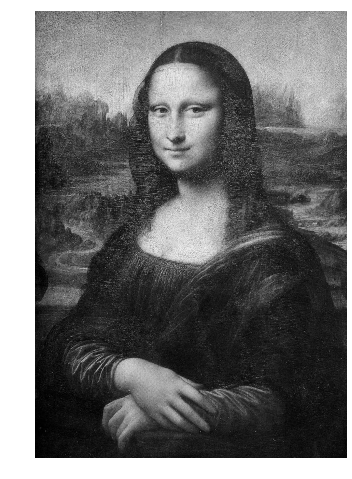

In [108]:
I_back = getImageFromPatches( patches , ratio)
plt.imshow(I_back, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

### PCA with sklearn

(2223L, 400L)
(2223L, 2L)
56
39


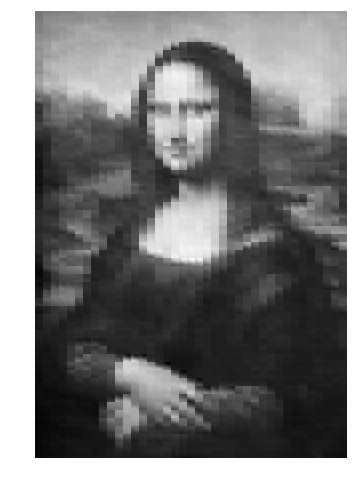

(1143L, 800L)
(1120L, 780L)


In [112]:
from sklearn.decomposition import FastICA, PCA

print patches.shape
pca = PCA(n_components = 2)
pca.fit(patches)
patches_pca = pca.fit_transform(patches)
print patches_pca.shape
patches_restored = pca.inverse_transform(patches_pca)

#coeff, score, latent = princomp(A,numpc)

I_back = getImageFromPatches( patches_restored , ratio)
plt.imshow(I_back, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

print I.shape
print I_back.shape

# PCA
### http://www.janeriksolem.net/2009/01/pca-for-images-using-python.html

The main purposes of a principal component analysis are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.

In [63]:
from numpy import mean,cov,cumsum,dot,linalg,size,flipud

def princomp(A,numpc=0):
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = linalg.eig(cov(M))
    p = size(coeff,axis=1)
    idx = argsort(latent) # sorting the eigenvalues
    idx = idx[::-1]       # in ascending order
    # sorting eigenvectors according to the sorted eigenvalues
    coeff = coeff[:,idx]
    latent = latent[idx] # sorting eigenvalues
    if numpc < p and numpc >= 0:
        coeff = coeff[:,range(numpc)] # cutting some PCs if needed
    score = dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

In [ ]:
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
A = imread('MonaLisaBW.jpg') # load an image
A = I#mean(A,2) # to get a 2-D array
full_pc = size(A,axis=1) # numbers of all the principal components
i = 1
dist = []
for numpc in range(0,full_pc+10,10): # 0 10 20 ... full_pc
    coeff, score, latent = princomp(A,numpc)
    Ar = dot(coeff,score).T+mean(A,axis=0) # image reconstruction
    # difference in Frobenius norm
    dist.append(linalg.norm(A-Ar,'fro'))
    # showing the pics reconstructed with less than 50 PCs
    if numpc <= 50:
        ax = subplot(2,3,i,frame_on=False)
        ax.xaxis.set_major_locator(NullLocator()) # remove ticks
        ax.yaxis.set_major_locator(NullLocator())
        i += 1 
        imshow(flipud(Ar))
        title('PCs # '+str(numpc))
        gray()

figure()
imshow(flipud(A))
title('numpc FULL')
gray()
show()

# trash

In [ ]:
from sklearn.decomposition import FastICA, PCA

# http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html
# http://www2.kobe-u.ac.jp/~ozawasei/pub/sci01.pdf 
# http://www2.kobe-u.ac.jp/~ozawasei/pub/ijcnn99.pdf
n = 20

# Compute ICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(pca)  # Reconstruct signals based on orthogonal components